# Intro to Reinforcement Learning

In this exercise you will learn the basics of reinforcement learning (RL), as well how to train a couple of RL models.

A lot of this information, text, and code is directly pooled from the following sources

Credits:
* Hugging Face Deep RL course [source](https://huggingface.co/learn/deep-rl-course/unit0/introduction)
* Gymnasium-Colaboratory-Starter [source](https://github.com/hom-bahrani/Gymnasium-Colaboratory-Starter)
* PyTorch RL Tutorials [source](https://pytorch.org/tutorials/)
* Wikipedia RL Page [source](https://en.wikipedia.org/wiki/Reinforcement_learning)

First, install and import the packages and libraries you will need throughout this exercise

In [2]:
# install gymnasium packages
%pip install gymnasium
%pip install gymnasium[classic-control]
%pip install swig

# install virtual display packages
%pip install pyvirtualdisplay
%pip install moviepy
%pip install --upgrade moviepy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Update the Package Index
!sudo apt update --quiet

# Install xvfb
!sudo apt-get install -y xvfb --quiet

Hit:1 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal InRelease
Hit:3 https://dl.yarnpkg.com/debian stable InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 https://repo.anaconda.com/pkgs/misc/debrepo/conda stable InRelease
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:2 https://packagecloud.io/github/git-lfs/ubuntu focal InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Get:9 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1200 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1496 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [3594 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [4069 kB]
Fetched 10.6 MB in 1s (7143 kB/s)
Reading package lists...
Building dependency tree...
Reading state infor

In [4]:
# gymnasium imports
import gymnasium as gym
from gymnasium.wrappers.record_video import RecordVideo

# video imports
import glob
import uuid
import io
import base64
from IPython.display import HTML
# from IPython import display as ipythondisplay

# ml imports
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# plot imports
import matplotlib
import matplotlib.pyplot as plt

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display as ipythondisplay


# utility imports
import os
import math
import random
from itertools import count
from collections import namedtuple, deque

# if GPU is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## 1. What is Reinforcement Learning?

<img src="images/RL_process.jpg" width="800" height="500">

Along with Supervised Learning and Unsupervised Learning, Reinforcement Learning is one of the 3 basic machine learning paradigms. The idea behind Reinforcement Learning is that an agent (an AI) will learn from the environment by interacting with it (through trial and error) and receiving rewards (negative or positive) as feedback for performing actions.

You can think of it like playing a video game where you get points for collecting coins and you lose points for getting hit by enemies. This "trains" you to collect coins, while avoiding enemies. Of course, games get a lot more complicated than that which is why one of the main challenges of RL is figuring out how to reward or punish the agent. That is to say, we use the [carrot and the stick](https://en.wikipedia.org/wiki/Carrot_and_stick).

The diagram describing how a RL agent interacts with a environment can be interpretated as such:

1. The Agent/Model/AI receives a **state $S_t$** (the info the agent receieves from the environment at time t)
2. Based on that **state** $S_t$ the agent takes an *action* $A_t$
3. The environment goes to a new **state** $S_{t+1}$
4. The environment gives some **reward** $R_{t+1}$ to the agent
5. repeat


### 1.1 Defining Cumulative Reward

The reward is fundamental in RL because it’s the only feedback for the agent. Thanks to it, our agent knows if the action taken was good or not.

Where
* $R()$: `Return` is the cumulative reward function
* $\tau$: `Trajectory` represented by *tau* is a sequence of `states` and `actions`
* $\gamma$: `Discount Rate` represented by *gamma* between 0-1
* $r_t$: `reward` at time step t

The cumulative reward is represented by the function

$R(\tau) = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \gamma^3 r_{t+4} + ...$

or 

$R(\tau) = \sum_{k=0}^{\infty} \gamma^k r_{t+k+1}$

An important insight here is that $\gamma$ is exponentiated, this means a smaller $\gamma$ causes a bigger `discount` and rewards at farther timesteps are `discounted` more. So, the smaller the $\gamma$ the less the agent cares more about closer/short-term rewards, and the bigger $\gamma$ the more the agent cares about farther/long-term rewards.

### 1.2 Defining Policy

You can think of `policy`, $\pi$, as the mind of the agent

This `policy` is the function we want to learn, our goal is to find the `optimal policy` $\pi^*$, the policy that maximizes expected return when the agent acts according to it. We find this $\pi^*$ through training. 

There are two types of policies:

1. Deterministic: a policy at a given state will always return the same action.
    * $\pi(s) = a$
2. Stochastic: outputs a probability distribution over actions.
    * $\pi(s|a) = P[A|s]$
        * $|$ means given
        * $P[]$ means probability distribution
        * $P[A|s]$ means a probability distribution over a set of actions given a state

There are two approaches to **train** our agent to find this optimal policy π*:

1. Directly, by teaching the agent to learn which action to take, given the current state: Policy-Based Methods.
2. Indirectly, teach the agent to learn which state is more valuable and then take the action that leads to the more valuable states: Value-Based Methods.



## 2. Creating an Environment

Now that you understand what a Reinforcement Learning agent is and does. Lets create an environment for our prospective RL agent to interact with.

To do that we will be using the environment library [Gymnasium](https://gymnasium.farama.org/) which was developed by OpenAI and handed off to the Farama Foundation to maintain and update.

*GitHub codespaces doesn't have an inbuilt display, create a virtual display instead.*

In [5]:
# install a virtual display
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

The first virtual environment you will be using is the `'CartPole-v1'` environment. This is a virtual version of the real life Cart Pole/Inverted Pendulum task, here is a short fun [video](https://youtu.be/nOSTzpA0nGk?si=mFYYwhLhTb5hcrpB) for you to see.

### 2.1 Understanding Gymnasium
Remember that at each step:
- Our Agent receives a **state ($S_0$)** from the **Environment** — i.e. we receive the first frame of our game (Environment).
- Based on that **state ($S_0$),** the Agent takes an **action ($A_0$)** — i.e. our Agent will move to the right.
- The environment transitions to a **new** **state ($S_1$)** — i.e. new frame.
- The environment gives some **reward ($R_1$)** to the Agent — i.e. we’re not dead *(Positive Reward +1)*.


With Gymnasium:

1. We create our environment using `gymnasium.make()`
2. We reset the environment to its initial state with `observation = env.reset()`

At each step:

3. Get an action using our model (in our example we take a random action)
4. Using `env.step(action)`, we perform this action in the environment and get
    - `observation`: The new state ($s_{t+1}$)
    - `reward`: The reward we get after executing the action
    - `terminated`: Indicates if the episode terminated (agent reach the terminal state)
    - `truncated`: Introduced with this new version, it indicates a timelimit or if an agent go out of bounds of the environment for instance.
    - `info`: A dictionary that provides additional information (depends on the environment).

For more explanations check this 👉 https://gymnasium.farama.org/api/env/#gymnasium.Env.step

If the episode is terminated:
- We reset the environment to its initial state with `observation = env.reset()`

#### 2.2 Task Types
There are two types of task: `Episodic Tasks` and `Continuous Tasks`

1. Episodic Task
    - In this case, we have a starting point and an ending point (a terminal state). This creates an episode: a list of States, Actions, Rewards, and new States.
2. Continuous task
    - These are tasks that continue forever (no terminal state). In this case, the agent must learn how to choose the best actions and simultaneously interact with the environment.
    - For instance, an agent that does automated stock trading. For this task, there is no starting point and terminal state. The agent keeps running until we decide to stop it.


## Question 1
In gymnasium the environments are set up as episodic tasks. A good practice is to look at documentation before using an environment to know its properties. If `'CartPole-v1'` is episodic, that means it must have termination conditions. List `'CartPole-v1'`'s termination conditions below.

Link to documentation -> https://gymnasium.farama.org/environments/classic_control/cart_pole/ 

<span style="color:green">Answer</span>

1.
2.
3.

#### 2.3 Default Properties of Gymnasium's Cart Pole environment 

##### **Action Space (The set of possible actions of the model)**

The action is a ndarray with shape (1,) which can take values {0, 1} indicating the direction of the fixed force the cart is pushed with.

0: Push cart to the left

1: Push cart to the right

Note: The velocity that is reduced or increased by the applied force is not fixed and it depends on the angle the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it

##### **Observation Space (The subset of the state the actor observes)**

The observation is a ndarray with shape (4,) with the values corresponding to the following positions and velocities:

<img src="images/observation_space.png" width="700" height="200">

##### **Rewards**

Since the goal is to keep the pole upright for as long as possible, a reward of +1 for every step taken, including the termination step, is allotted. The threshold for rewards is 500 for v1 and 200 for v0.


In [9]:
# How to access the above values
env = gym.make("CartPole-v1")
env.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation", env.observation_space.sample()) # Get a random observation
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.n)
print("Action Space Sample", env.action_space.sample()) # Take a random action

_____OBSERVATION SPACE_____ 

Observation Space Shape (4,)
Sample observation [-2.6535292e+00 -2.3067519e+38  3.5593644e-02  3.0061310e+38]

 _____ACTION SPACE_____ 

Action Space Shape 2
Action Space Sample 0


#### 2.4 Gymnasium Interactive Loop

Below is the code for a simple interactive loop where instead of a agent predicting a action we simply sample a random action. Look at what happens to the cartpole when random actions are chosen, and specifically note how long the episode lasts (duration) which the model will be learning to improve.

In [3]:
init_env = gym.make('CartPole-v1', render_mode='rgb_array')

folder_name = os.path.join('video', 'CartPole-v1', f'{uuid.uuid4()}')

# Use the wrapper environment RecordVideo() to record video
env = RecordVideo(init_env, folder_name, disable_logger=True)

observation, info = env.reset()

for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

env.close()

In [18]:
def show_video(folder_name, episode='last'):
    mp4list = glob.glob(f'{folder_name}/*.mp4')
    if len(mp4list) > 0:
        sorted_mp4list = sorted(mp4list, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        if episode == 'last':
            mp4 = sorted_mp4list[-1]
        elif episode == 'first':
            mp4 = sorted_mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                    </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

In [19]:
show_video(folder_name)

## 3. Deep Q Networks



In [21]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [22]:
class DQN(nn.Module):

    def __init__(self, n_observations, n_actions):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(n_observations, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, n_actions)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)

In [23]:
# BATCH_SIZE is the number of transitions sampled from the replay buffer
# GAMMA is the discount factor as mentioned in the previous section
# EPS_START is the starting value of epsilon
# EPS_END is the final value of epsilon
# EPS_DECAY controls the rate of exponential decay of epsilon, higher means a slower decay
# TAU is the update rate of the target network
# LR is the learning rate of the ``AdamW`` optimizer
BATCH_SIZE = 128
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005
LR = 1e-4

# Get number of actions from gym action space
n_actions = env.action_space.n
# Get the number of state observations
state, info = env.reset()
n_observations = len(state)

policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)
memory = ReplayMemory(10000)


steps_done = 0


def select_action(state):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold:
        with torch.no_grad():
            # t.max(1) will return the largest column value of each row.
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
            return policy_net(state).max(1).indices.view(1, 1)
    else:
        return torch.tensor([[env.action_space.sample()]], device=device, dtype=torch.long)


episode_durations = []


def plot_durations(show_result=False):
    plt.figure(1)
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    if show_result:
        plt.title('Result')
    else:
        plt.clf()
        plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        if not show_result:
            ipythondisplay.display(plt.gcf())
            ipythondisplay.clear_output(wait=True)
        else:
            ipythondisplay.display(plt.gcf())

In [25]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1).values
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    with torch.no_grad():
        next_state_values[non_final_mask] = target_net(non_final_next_states).max(1).values
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    # In-place gradient clipping
    torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    optimizer.step()

Complete


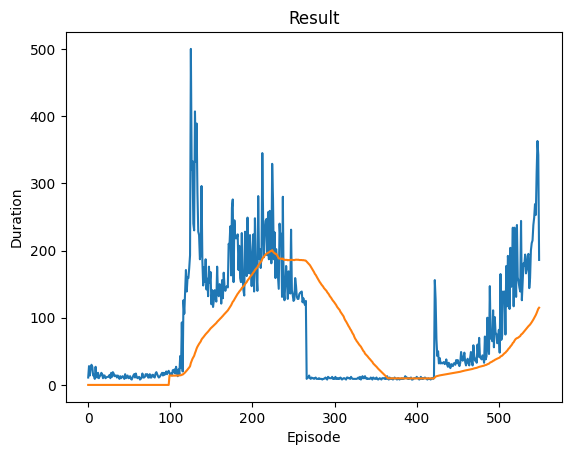

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [28]:
if torch.cuda.is_available():
    num_episodes = 500
else:
    num_episodes = 500

for i_episode in range(num_episodes):
    # Initialize the environment and get its state
    state, info = env.reset()
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
    for t in count():
        action = select_action(state)
        observation, reward, terminated, truncated, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)
        done = terminated or truncated

        if terminated:
            next_state = None
        else:
            next_state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the policy network)
        optimize_model()

        # Soft update of the target network's weights
        # θ′ ← τ θ + (1 −τ )θ′
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()
        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key]*TAU + target_net_state_dict[key]*(1-TAU)
        target_net.load_state_dict(target_net_state_dict)

        if done:
            episode_durations.append(t + 1)
            plot_durations()
            break

print('Complete')
plot_durations(show_result=True)
plt.ioff()
plt.show()

In [ ]:
show_video(folder_name)

In [ ]:
os.listdir(folder_name)

['rl-video-episode-125.mp4',
 'rl-video-episode-27.mp4',
 'rl-video-episode-8.meta.json',
 'rl-video-episode-8.mp4',
 'rl-video-episode-64.meta.json',
 'rl-video-episode-1.mp4',
 'rl-video-episode-216.mp4',
 'rl-video-episode-27.meta.json',
 'rl-video-episode-512.meta.json',
 'rl-video-episode-0.meta.json',
 'rl-video-episode-729.mp4',
 'rl-video-episode-1000.mp4',
 'rl-video-episode-0.mp4',
 'rl-video-episode-512.mp4',
 'rl-video-episode-216.meta.json',
 'rl-video-episode-125.meta.json',
 'rl-video-episode-343.mp4',
 'rl-video-episode-729.meta.json',
 'rl-video-episode-64.mp4',
 'rl-video-episode-343.meta.json',
 'rl-video-episode-1000.meta.json',
 'rl-video-episode-1.meta.json']

In [ ]:
def show_video(folder_name, episode='last'):
    mp4list = glob.glob(f'{folder_name}/*.mp4')
    if len(mp4list) > 0:
        sorted_mp4list = sorted(mp4list, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        if episode == 'last':
            mp4 = sorted_mp4list[-1]
        elif episode == 'first':
            mp4 = sorted_mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                    </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

In [ ]:
show_video(folder_name)